![example](images/director_shot.jpeg)

# An Insight On Success In Movie Production

**Authors:** Nancy Ho
***

## Overview

To stay on par with its tech industry competitors, Microsoft has decided to open a movie studio, but doesn't know where to start. In this project, I use data from movie databases such as IMDB and Box Office Mojo to analyze the elements of successful movies. By highlighting movie genres that are well-received and those that also make significant profits, I provide insights as to the possible routes Microsoft can take to flourish in movie production.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

As online streaming grows in popularity, you see more platforms being introduced by the day, some of them including Amazon Prime and Apple TV. These streaming platforms promise original content, most notably movies, and have been widely successful. In response to this boom, Microsoft has finally decided to make the move towards movie production as well to start out. However, it can be difficult to figure out what to do from there, but through meaningful analyses of the movie industry, we can gain a general direction of where to go.

In order to start off on the right foot, it's important to answer the question: **"What is a successful movie?"** From a business perspective, something is successful when it **turns a significant profit for the company**. Therefore, a successful movie at its core is a movie that generates a significant profit that offsets expenses from casting, production, etc. However. it's important to remember where this profit comes from, namely the people who pay for and watch these movies. By this logic, you could argue that **good ratings** also contribute largely to a movie's success.

In this analysis, we will be looking at data from movie databases while trying to answer these questions:

- Which kinds of movies generate the most profit?
- Which movies are best received by moviegoers (and critics)?
- Is there a significant relationship between profits and ratings?

Being able to answer these questions through data cleaning and visualization will enable Microsoft to make informed decisions on movie production and take steps towards making a presence for themselves in this industry.

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
# Here you run your code to explore the data
conn = sqlite3.connect('data\movies.db')
cur = conn.cursor()

`imdb_title_basics`

In [30]:
cur.execute("""SELECT * 
               FROM imdb_title_basics;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


`imdb_title_ratings`

In [31]:
cur.execute("""SELECT * 
               FROM imdb_title_ratings;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,idx,tconst,averagerating,numvotes
0,0,tt10356526,8.3,31
1,1,tt10384606,8.9,559
2,2,tt1042974,6.4,20
3,3,tt1043726,4.2,50352
4,4,tt1060240,6.5,21


`bom_movie_gross`

In [34]:
cur.execute("""SELECT * 
               FROM bom_movie_gross;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,idx,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000.0,652000000,2010
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,3,Inception,WB,292600000.0,535700000,2010
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010


`rotten_tomatoes_movies`

In [33]:
cur.execute("""SELECT * 
               FROM rotten_tomatoes_movies;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,idx,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

To create the datasets I used in my analysis, I used SQL queries to join tables from `movies.db` database to ensure that my datasets would only contain the columns that would be the most relevant to my investigation. To use this data later on, I stored the data I called with those SQL queries into Pandas dataframes and adjusted them as necessary to my needs to achieve meaningful analyses.

For my first dataframe `gross_df`, I joined the `bom_movie_gross` and `imdb_title_basics` tables

In [27]:
cur.execute("""SELECT b.title AS movie, b.domestic_gross, b.foreign_gross, m.genres 
               FROM bom_movie_gross b
               JOIN imdb_title_basics m
               ON b.title = m.primary_title
               GROUP BY movie;""")
gross_df = pd.DataFrame(cur.fetchall())
gross_df.columns = [x[0] for x in cur.description]
gross_df.head()

,movie,domestic_gross,foreign_gross,genres
0,'71,1300000.0,355000,"Action,Drama,Thriller"
1,"1,000 Times Good Night",53900.0,None,"Drama,War"
2,10 Cloverfield Lane,72100000.0,38100000,"Drama,Horror,Mystery"
3,10 Years,203000.0,None,"Comedy,Drama,Romance"
4,1001 Grams,11000.0,None,Drama


During the exploratory data analysis stage, I discovered that the `foreign_gross` column consisted of strings instead of numbers like it seems, so I changed the whole column to `float` type before proceeding.

In [4]:
gross_df['foreign_gross'] = gross_df['foreign_gross'].str.replace(',','').astype(float)

Then I create the `total_gross` column to determine the total gross profit movies had made. This information will become relevant when I plot out the gross information later.

In [5]:
gross_df['foreign_gross'] = gross_df['foreign_gross'].fillna(0)
gross_df = gross_df.dropna(subset = ['domestic_gross'])
gross_df['total_gross'] = gross_df['domestic_gross'] + gross_df['foreign_gross']

I also wanted to investigate the relationship between gross profit and individual genres, but discovered that all the entries in the `genres` column were all single strings. I made a new column, `split_genres`, to create a list containing the individual genres of each movie entry as indicated by commas in the strings of the `genre` column.

In [6]:
gross_df['split_genres'] = gross_df['genres'].str.split(',')
gross_df = gross_df.dropna(subset = ['genres'])
gross_df.head()

,movie,domestic_gross,foreign_gross,genres,total_gross,split_genres
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",1655000.0,"[Action, Drama, Thriller]"
1,"1,000 Times Good Night",53900.0,0.0,"Drama,War",53900.0,"[Drama, War]"
2,10 Cloverfield Lane,72100000.0,38100000.0,"Drama,Horror,Mystery",110200000.0,"[Drama, Horror, Mystery]"
3,10 Years,203000.0,0.0,"Comedy,Drama,Romance",203000.0,"[Comedy, Drama, Romance]"
4,1001 Grams,11000.0,0.0,Drama,11000.0,[Drama]


To be able to plot out my data by individual genres, I used the `.explode()` command to split the genres into individual columns. I assigned the dataframe with split rows to a new dataframe, `split_gross_df`, in case I needed to do additional analysis on the original `gross_df` later. 

In [9]:
split_gross_df = gross_df.explode('split_genres')
split_gross_df.head(10)

,movie,domestic_gross,foreign_gross,genres,total_gross,split_genres
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",1655000.0,Action
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",1655000.0,Drama
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",1655000.0,Thriller
1,"1,000 Times Good Night",53900.0,0.0,"Drama,War",53900.0,Drama
1,"1,000 Times Good Night",53900.0,0.0,"Drama,War",53900.0,War
2,10 Cloverfield Lane,72100000.0,38100000.0,"Drama,Horror,Mystery",110200000.0,Drama
2,10 Cloverfield Lane,72100000.0,38100000.0,"Drama,Horror,Mystery",110200000.0,Horror
2,10 Cloverfield Lane,72100000.0,38100000.0,"Drama,Horror,Mystery",110200000.0,Mystery
3,10 Years,203000.0,0.0,"Comedy,Drama,Romance",203000.0,Comedy
3,10 Years,203000.0,0.0,"Comedy,Drama,Romance",203000.0,Drama


Using the same process as `gross_df`, I then created `ratings_df` for investigating the average ratings of movies based on genre.

In [8]:
cur.execute("""SELECT m.primary_title, r.averagerating, r.numvotes, m.genres
               FROM imdb_title_basics m
               JOIN imdb_title_ratings r
               USING(tconst);""")
ratings_df = pd.DataFrame(cur.fetchall())
ratings_df.columns = [x[0] for x in cur.description]
ratings_df.head()

,primary_title,averagerating,numvotes,genres
0,Sunghursh,7.0,77,"Action,Crime,Drama"
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama"
2,The Other Side of the Wind,6.9,4517,Drama
3,Sabse Bada Sukh,6.1,13,"Comedy,Drama"
4,The Wandering Soap Opera,6.5,119,"Comedy,Drama,Fantasy"


Once again, I follow the same steps to separate the genres for each movie and assign the dataframe with split genres for all the movies to `split_ratings_df`.

In [10]:
ratings_df['split_genres'] = ratings_df['genres'].str.split(',')
ratings_df.head()

,primary_title,averagerating,numvotes,genres,split_genres
0,Sunghursh,7.0,77,"Action,Crime,Drama","[Action, Crime, Drama]"
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama","[Biography, Drama]"
2,The Other Side of the Wind,6.9,4517,Drama,[Drama]
3,Sabse Bada Sukh,6.1,13,"Comedy,Drama","[Comedy, Drama]"
4,The Wandering Soap Opera,6.5,119,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [11]:
ratings_df = ratings_df.dropna(subset = ['genres'])
split_ratings_df = ratings_df.explode('split_genres')
split_ratings_df.head(10)

,primary_title,averagerating,numvotes,genres,split_genres
0,Sunghursh,7.0,77,"Action,Crime,Drama",Action
0,Sunghursh,7.0,77,"Action,Crime,Drama",Crime
0,Sunghursh,7.0,77,"Action,Crime,Drama",Drama
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama",Biography
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama",Drama
2,The Other Side of the Wind,6.9,4517,Drama,Drama
3,Sabse Bada Sukh,6.1,13,"Comedy,Drama",Comedy
3,Sabse Bada Sukh,6.1,13,"Comedy,Drama",Drama
4,The Wandering Soap Opera,6.5,119,"Comedy,Drama,Fantasy",Comedy
4,The Wandering Soap Opera,6.5,119,"Comedy,Drama,Fantasy",Drama


After dealing with splitting the genres in `ratings_df`, I got curious about popular and well-received genre combinations. Seeing as there were a good number of them before, I wanted to filter out genre combinations based on how many movies had those combinations, and chose a threshold of 500 movies. I go ahead and store this information into the `combined_ratings_df` to distinguish it from the other rating dataframes.

In [12]:
x_df = ratings_df.groupby('genres').count().iloc[:,0]
x2_df = x_df[x_df >= 500].index
combined_ratings_df = ratings_df[ratings_df.genres.isin(x2_df)]
combined_ratings_df.groupby('genres').mean().head()

,averagerating,numvotes
genres,,
Action,5.757712,336.115424
"Action,Crime,Drama",5.989146,9899.560498
"Biography,Documentary",7.221758,289.139769
Comedy,5.777998,1217.181008
"Comedy,Drama",6.364119,2469.560183


To look for a possible relationship between a movie's profits and ratings, I merged the original dataframes `gross_df` and `ratings_df` to reduce the amount of duplicate entries for all the movies in both dataframes.

In [13]:
gross_and_ratings_df = gross_df.merge(ratings_df, left_on='movie', right_on='primary_title', suffixes=('', '_y'))
gross_and_ratings_df.head()

,movie,domestic_gross,foreign_gross,genres,total_gross,split_genres,primary_title,averagerating,numvotes,genres_y,split_genres_y
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",1655000.0,"[Action, Drama, Thriller]",'71,7.2,46103,"Action,Drama,Thriller","[Action, Drama, Thriller]"
1,"1,000 Times Good Night",53900.0,0.0,"Drama,War",53900.0,"[Drama, War]","1,000 Times Good Night",7.1,6848,"Drama,War","[Drama, War]"
2,10 Cloverfield Lane,72100000.0,38100000.0,"Drama,Horror,Mystery",110200000.0,"[Drama, Horror, Mystery]",10 Cloverfield Lane,7.2,260383,"Drama,Horror,Mystery","[Drama, Horror, Mystery]"
3,10 Years,203000.0,0.0,"Comedy,Drama,Romance",203000.0,"[Comedy, Drama, Romance]",10 Years,6.1,22484,"Comedy,Drama,Romance","[Comedy, Drama, Romance]"
4,1001 Grams,11000.0,0.0,Drama,11000.0,[Drama],1001 Grams,6.3,1301,Drama,[Drama]


To further investigate ratings, particularly between audiences and critics, I created `rotten_tomatoes_df` as well. Like the previous dataframes, I split the genres here as well and create the `split_tomatoes_df` dataframe.

In [14]:
cur.execute("""SELECT movie_title, genres, tomatometer_status, tomatometer_rating, tomatometer_count, audience_status, audience_rating, audience_count
               FROM rotten_tomatoes_movies
               ORDER BY audience_count DESC
               LIMIT 1000;""")
rotten_tomatoes_df = pd.DataFrame(cur.fetchall())
rotten_tomatoes_df.columns = [x[0] for x in cur.description]
rotten_tomatoes_df.head()

,movie_title,genres,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count
0,Titanic,"Drama, Romance",Certified-Fresh,89.0,192.0,Upright,69.0,35797635.0
1,The Lord of the Rings: The Return of the King,"Action & Adventure, Classics, Science Fiction ...",Certified-Fresh,93.0,275.0,Upright,86.0,34679773.0
2,Spider-Man,"Action & Adventure, Mystery & Suspense, Scienc...",Certified-Fresh,90.0,245.0,Upright,67.0,34297354.0
3,Shrek 2,"Animation, Comedy, Kids & Family, Science Fict...",Certified-Fresh,89.0,236.0,Upright,69.0,34232524.0
4,Harry Potter and the Goblet of Fire,"Action & Adventure, Kids & Family, Science Fic...",Certified-Fresh,88.0,255.0,Upright,74.0,34153607.0


In [15]:
rotten_tomatoes_df['split_genres'] = rotten_tomatoes_df['genres'].str.split(',')
rotten_tomatoes_df = rotten_tomatoes_df.explode('split_genres')
rotten_tomatoes_df['split_genres'] = rotten_tomatoes_df['split_genres'].str.lstrip(" ")

In [16]:
split_tomatoes_df = rotten_tomatoes_df.groupby('split_genres').mean()
split_tomatoes_df.head()

,tomatometer_rating,tomatometer_count,audience_rating,audience_count
split_genres,,,,
Action & Adventure,59.341463,159.509756,66.839024,1.944110e+06
Animation,76.010870,135.000000,73.086957,1.653685e+06
Art House & International,85.333333,182.000000,81.000000,4.090327e+05
Classics,80.750000,113.071429,81.642857,4.141992e+06
Comedy,54.342466,130.698630,64.849315,2.446065e+06


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [21]:
# Here you run your code to model the data
alphabetical_genres = split_gross_df.split_genres.unique()
alphabetical_genres.sort()

Total gross for movies based on genre (domestic gross is denoted)
- Action, Adventure, Animated and Sci-Fi movies do the best in terms of domestic and international profit

Text(0.5, 1.0, 'Average Gross Profit Based On Genre')

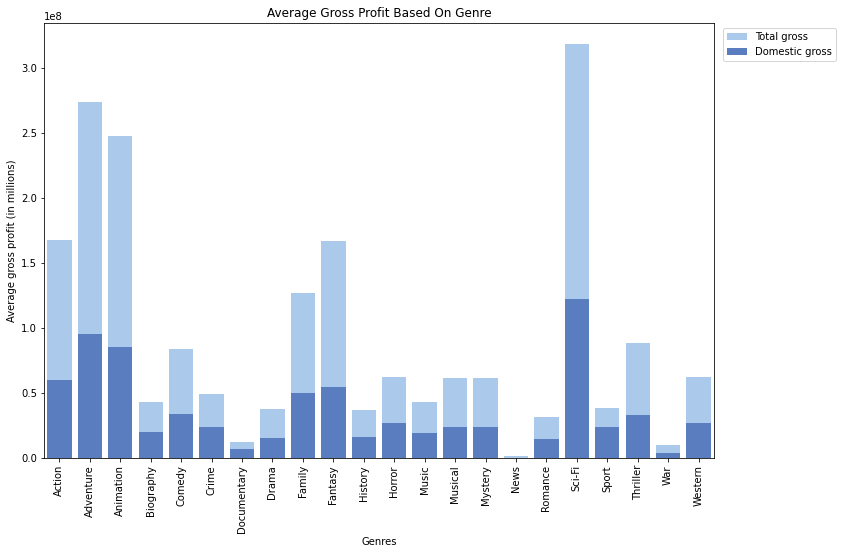

In [22]:
f, ax = plt.subplots(figsize=(12,8))
sns.set_color_codes('pastel')
sns.barplot(x='split_genres', y='total_gross', data=split_gross_df, label='Total gross', color='b', ci=None, order=alphabetical_genres)

sns.set_color_codes('muted')
sns.barplot(x='split_genres', y='domestic_gross', data=split_gross_df, label='Domestic gross', color='b', ci=None, order=alphabetical_genres)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1.19, 1), loc="upper right", frameon=True)
ax.set_xlabel('Genres')
ax.set_ylabel('Average gross profit (in millions)')
ax.set_title('Average Gross Profit Based On Genre')

IMDB average ratings by individual genres
- Non-fictional movies tend to do the best

Text(0.5, 1.0, 'IMDB Average Movie Ratings (Individual Genres)')

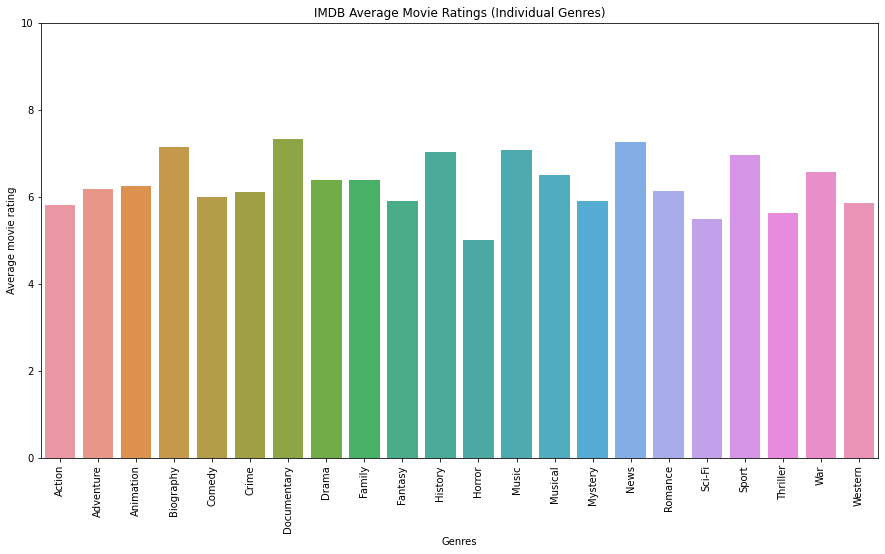

In [23]:
f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='split_genres', y='averagerating', data=split_ratings_df, ci=None, order=alphabetical_genres)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0,10)
ax.set_xlabel('Genres')
ax.set_ylabel('Average movie rating')
ax.set_title('IMDB Average Movie Ratings (Individual Genres)')

IMDB average ratings for common combinations of genres (more than 500 movies)
- again, we see that non-fictional genre combinations tend to rate better than others

Text(0.5, 1.0, 'IMDB Average Movie Ratings (Combined Genres)')

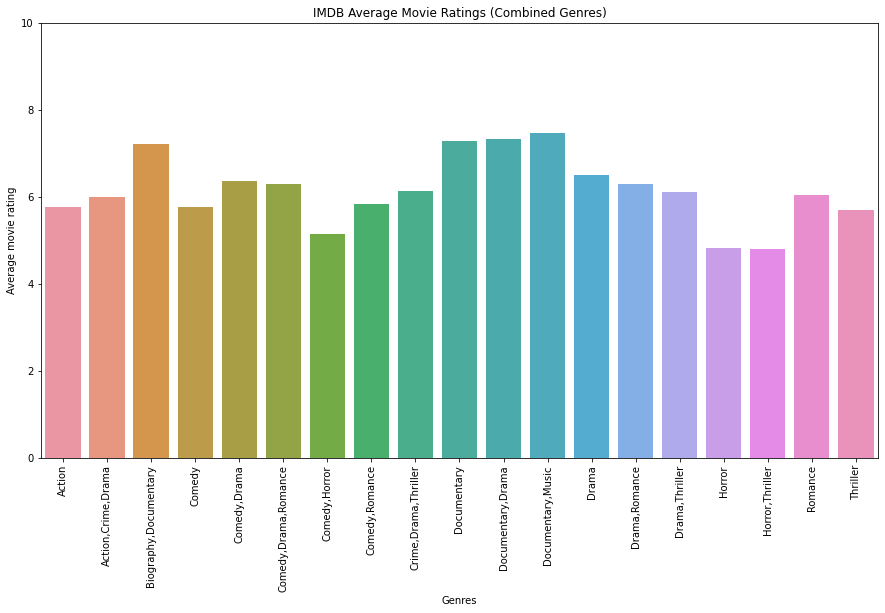

In [24]:
f, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='genres', y='averagerating', data=combined_ratings_df,
                order=x2_df, ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0,10)
ax.set_xlabel('Genres')
ax.set_ylabel('Average movie rating')
ax.set_title('IMDB Average Movie Ratings (Combined Genres)')

Comparing audience vs critics (tomatometer) ratings by genre
- 

Text(0, 0.5, 'Rating')

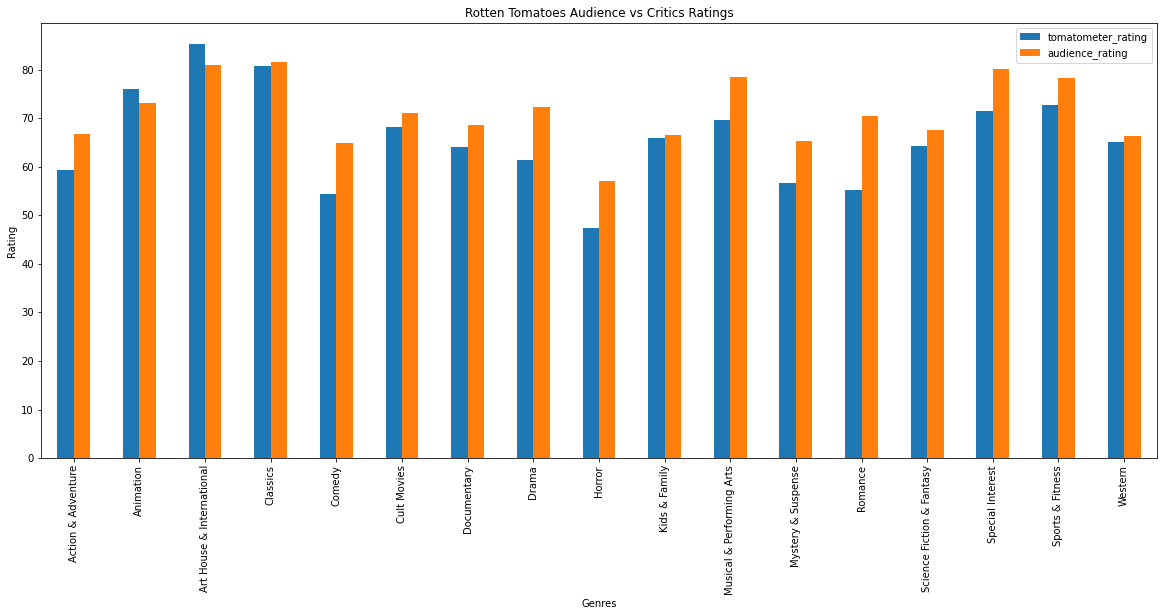

In [19]:
fig, ax = plt.subplots(figsize=(20,8))
split_tomatoes_df[['tomatometer_rating', 'audience_rating']].plot(kind='bar', ax=ax)
ax.set_title('Rotten Tomatoes Audience vs Critics Ratings')
ax.set_xlabel('Genres')
ax.set_ylabel('Rating')

Seeing if there's a correlation between gross profit and average rating (just because a movie is successful doesn't mean it's a good movie)
- A lot of the movies that made significant profits don't have high ratings
- There is a correlation between gross profit and rating, but it's very weak. Just because a movie makes profit doesn't mean it's good, and just because a movie is considered good doesn't mean it could be called "successful".

Text(0, 0.5, 'Average rating')

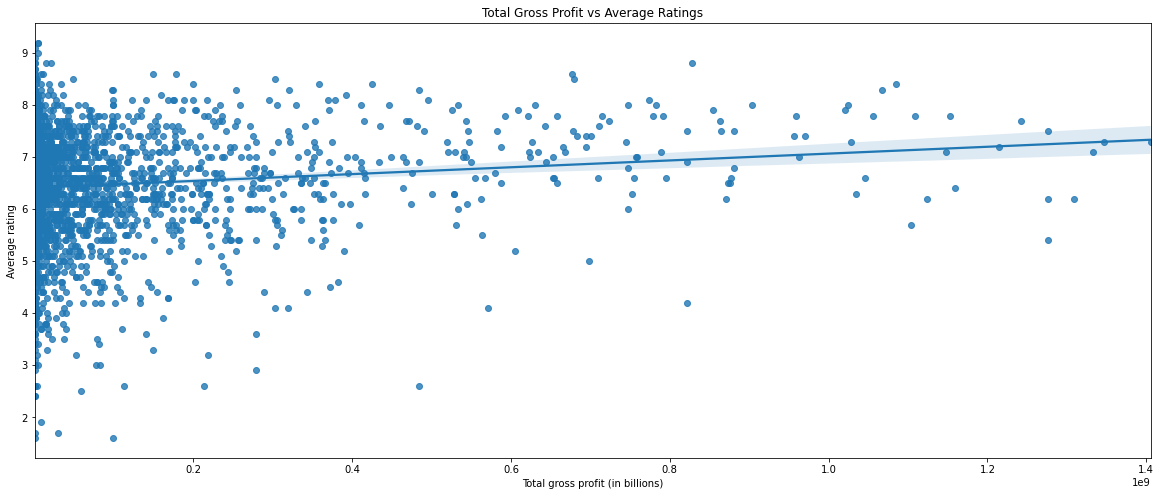

In [20]:
f, ax = plt.subplots(figsize=(20,8))
sns.regplot(x="total_gross", y="averagerating", data=gross_and_ratings_df, ax=ax)
ax.set_title('Total Gross Profit vs Average Ratings')
ax.set_xlabel('Total gross profit (in billions)')
ax.set_ylabel('Average rating')

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

- You may want to start by offering positions to up and coming directors and scriptwriters, preferrably those who had experience working on successful movies before, and gain leverage in the movie production process.
- Something to take into consideration is that for some movies, a large part of their success can be attributed to expectations tied to many of its factors, such as it being part of a series, or having certain A-list actors. If you want to make a footprint in the movie industry, be sure you keep those limitations in mind as you try to work your way up.
- Quality over quantity